# Trends in Voter Registration in October 2018 versus November 2018 Results

Exploring the dumbest correlation possible

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

# Use the Gill Sans font
import matplotlib.pylab as pylab

import matplotlib.font_manager as fm
font = fm.FontProperties(
       family = 'Gill Sans',
       fname = '/usr/share/fonts/truetype/adf/GilliusADF-Regular.otf')
params = {
         'font.size': 14,
         'font.style': 'italic',
         'legend.fontsize': 14,
         'figure.figsize': (9.5, 6),
         'axes.labelsize': 14,
         'axes.titlesize': 16,
         'xtick.labelsize': 14,
         'ytick.labelsize': 14,
         'axes.spines.right' : False,
         'axes.spines.left' : False,
         'axes.spines.top' : False,
         'axes.spines.bottom' : False,
         'font.family' : 'Gill Sans'}
pylab.rcParams.update(params)

## Data Cleaning

### Election Results Data

Reading in the November 2018 election results data, isolating State Senate races, and digesting their outcomes

In [2]:
election_df = pd.read_excel('../data/results/2018GeneralResults.xlsx')
election_df.head()

,OFFICE/BALLOT ISSUE NUMBER,PARTY,COUNTY,CANDIDATE/JUDGE/BALLOT TITLE,YES VOTES,YES PERCENT,NO VOTES,NO PERCENT
0,United States Representative - District 1,Republican Party,ARAPAHOE,Charles Casper Stockham,8300,0.0224,NaN,NaN
1,United States Representative - District 1,Republican Party,DENVER,Charles Casper Stockham,57186,0.1547,NaN,NaN
2,United States Representative - District 1,Republican Party,JEFFERSON,Charles Casper Stockham,19721,0.0533,NaN,NaN
3,United States Representative - District 1,Republican Party,TOTAL,Charles Casper Stockham,85207,0.2305,NaN,NaN
4,United States Representative - District 1,Democratic Party,ARAPAHOE,Diana DeGette,15645,0.0423,NaN,NaN


Pluck out State Senate election results as a separate dataframe

In [3]:
state_senate_df = election_df[election_df['OFFICE/BALLOT ISSUE NUMBER'].str.contains('State Senate')]
state_senate_df['OFFICE/BALLOT ISSUE NUMBER'] = state_senate_df['OFFICE/BALLOT ISSUE NUMBER'].str.replace('State Senate - District', 'SD')
county_vals = (state_senate_df.COUNTY != 'TOTAL')
state_senate_df = state_senate_df[county_vals]
elections = state_senate_df['OFFICE/BALLOT ISSUE NUMBER'].unique()
print(state_senate_df)

     OFFICE/BALLOT ISSUE NUMBER             PARTY      COUNTY  \
1778                       SD 1  Republican Party    CHEYENNE   
1779                       SD 1  Republican Party      ELBERT   
1780                       SD 1  Republican Party  KIT CARSON   
1781                       SD 1  Republican Party     LINCOLN   
1782                       SD 1  Republican Party       LOGAN   
...                         ...               ...         ...   
1913                      SD 32  Democratic Party      DENVER   
1915                      SD 32  Republican Party      DENVER   
1917                      SD 32       Independent      DENVER   
1919                      SD 34  Democratic Party      DENVER   
1921                      SD 34  Republican Party      DENVER   

     CANDIDATE/JUDGE/BALLOT TITLE YES VOTES  YES PERCENT  NO VOTES  NO PERCENT  
1778             Jerry Sonnenberg       829       0.0125       NaN         NaN  
1779             Jerry Sonnenberg     11132       0.1681 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Voter Registration Data

Reading in and digesting the October 2020 voter registration data by county and State Senate district

In [4]:
columns = ['DISTRICT', 'COUNTY', 
           'ACN-ACTIVE', 'APV-ACTIVE', 'DEM-ACTIVE', 'GRN-ACTIVE', 'LBR-ACTIVE', 'REP-ACTIVE',
       'UAF-ACTIVE', 'UNI-ACTIVE', 'TOTAL-ACTIVE', 
           'ACN-INACTIVE', 'APV-INACTIVE', 'DEM-INACTIVE', 'GRN-INACTIVE',
       'LBR-INACTIVE', 'REP-INACTIVE', 'UAF-INACTIVE', 'UNI-INACTIVE', 'TOTAL-INACTIVE', 
           'ACN-PREREG', 'APV-PREREG',
       'DEM-PREREG', 'GRN-PREREG', 'LBR-PREREG', 'REP-PREREG', 'UAF-PREREG', 'UNI-PREREG', 'TOTAL-PREREG',
           'TOTAL']

voter_affiliation_df = pd.read_excel('../data/registration/Oct_2018_voter_registration.xlsx', 'State Senate Districts', 
                                    header=2, names=columns)

# empty squares have no voters
voter_affiliation_df = voter_affiliation_df.fillna(0)

# Remove each "Total" County instance
county_vals = (voter_affiliation_df.COUNTY != 'Total')
voter_affiliation_df = voter_affiliation_df[county_vals]

For the sake of simplicity, assume everyone who isn't a Republican or Democrat is "Other", and look at that as a massed group.

In [5]:
collapsed_columns = {'ACN-ACTIVE' : 'OTHER-ACTIVE', 
                     'APV-ACTIVE' : 'OTHER-ACTIVE', 
                     'GRN-ACTIVE' : 'OTHER-ACTIVE', 
                     'LBR-ACTIVE' : 'OTHER-ACTIVE', 
                     'UAF-ACTIVE' : 'OTHER-ACTIVE', 
                     'UNI-ACTIVE' : 'OTHER-ACTIVE', 
                     'ACN-INACTIVE' : 'OTHER-INACTIVE', 
                     'APV-INACTIVE' : 'OTHER-INACTIVE', 
                     'DEM-INACTIVE' : 'OTHER-INACTIVE', 
                     'GRN-INACTIVE' : 'OTHER-INACTIVE',
                     'LBR-INACTIVE' : 'OTHER-INACTIVE', 
                     'REP-INACTIVE' : 'OTHER-INACTIVE', 
                     'UAF-INACTIVE' : 'OTHER-INACTIVE', 
                     'UNI-INACTIVE' : 'OTHER-INACTIVE',
                     'ACN-PREREG' : 'OTHER-PREREG', 
                     'APV-PREREG' : 'OTHER-PREREG',
                     'DEM-PREREG' : 'OTHER-PREREG', 
                     'GRN-PREREG' : 'OTHER-PREREG', 
                     'LBR-PREREG' : 'OTHER-PREREG', 
                     'REP-PREREG' : 'OTHER-PREREG', 
                     'UAF-PREREG' : 'OTHER-PREREG', 
                     'UNI-PREREG' : 'OTHER-PREREG',
                     'DISTRICT' : 'DISTRICT', 
                     'COUNTY' : 'COUNTY', 
                     'DEM-ACTIVE' : 'DEM-ACTIVE', 
                     'REP-ACTIVE' : 'REP-ACTIVE', 
                     'TOTAL-ACTIVE' : 'TOTAL-ACTIVE', 
                     'DEM-INACTIVE' : 'DEM-INACTIVE', 
                     'REP-INACTIVE' : 'REP-INACTIVE', 
                     'TOTAL-INACTIVE' : 'TOTAL-INACTIVE', 
                     'DEM-PREREG' : 'DEM-PREPREG', 
                     'REP-PREREG' : 'REP-PREREG', 
                     'TOTAL-PREREG' : 'TOTAL-PREREG',
                     'TOTAL' : 'TOTAL'
                    }

voter_affiliation_df = voter_affiliation_df.groupby(collapsed_columns, axis=1).sum()

voter_affiliation_df['COUNTY'] = voter_affiliation_df['COUNTY'].str.upper()
print(voter_affiliation_df)

         COUNTY  DEM-ACTIVE  DEM-INACTIVE  DEM-PREPREG     DISTRICT  \
0      CHEYENNE         129            23          0.0         SD 1   
1        ELBERT        2185           239         16.0         SD 1   
2    KIT CARSON         519            85          4.0         SD 1   
3       LINCOLN         377            73          0.0         SD 1   
4         LOGAN        1665           279          1.0         SD 1   
..          ...         ...           ...          ...          ...   
119     PROWERS        1279           192         16.0        SD 35   
120      PUEBLO        3877           242         28.0        SD 35   
121  RIO GRANDE        2068           314          3.0        SD 35   
122    SAGUACHE        1570           242          0.0        SD 35   
124         NaN     1038975        144932       8420.0  State Total   

     OTHER-ACTIVE  OTHER-INACTIVE  OTHER-PREREG  REP-ACTIVE  REP-INACTIVE  \
0           301.0            62.0           6.0         804           

## Election Analysis

Goal here is to look at active voters in each party versus how the vote broke in each county and Senate District election. This leads to a 3x3 plot that shows the fraction of total active voters in each party for each county and Senate District, and then the fraction of the votes from that county that went to each party, D/R/Other.

In [6]:
regs_dict={'D' : [],
          'R' : [],
          'O' : []}

votes_dict={'D' : [],
           'R' : [],
           'O' : []}

tot_votes = []

print_output = False

for election in elections:
    district_election = state_senate_df[state_senate_df['OFFICE/BALLOT ISSUE NUMBER'] == election]
    district_voters   = voter_affiliation_df[voter_affiliation_df['DISTRICT'] == election]
    for county in district_election.COUNTY.unique():
        # Get total active voters from a district
        tot_votes.append(district_voters[district_voters.COUNTY == county]['TOTAL-ACTIVE'].values[0])
        
        # Party affiliation of active voters as fraction of total active voters
        county_voters = (district_voters.COUNTY == county)
        Ds = district_voters[county_voters]['DEM-ACTIVE'].values[0]
        Rs = district_voters[county_voters]['REP-ACTIVE'].values[0]
        Os = district_voters[county_voters]['OTHER-ACTIVE'].values[0]
        regs_dict['D'].append(1.*Ds/(Ds+Rs+Os))
        regs_dict['R'].append(1.*Rs/(Ds+Rs+Os))
        regs_dict['O'].append(1.*Os/(Ds+Rs+Os))
        
        # Total votes cast
        county_election = (district_election['COUNTY']==county)

        if len(district_election[county_election][district_election[county_election].PARTY == 'Democratic Party']):
            dem_votes = district_election[county_election][district_election[county_election].PARTY == 'Democratic Party']['YES VOTES'].values[0]
        if len(district_election[county_election][district_election[county_election].PARTY == 'Republican Party']):
            rep_votes = district_election[county_election][district_election[county_election].PARTY == 'Republican Party']['YES VOTES'].values[0]
        
        other_candidates = (district_election[county_election].PARTY != 'Republican Party') & (district_election[county_election].PARTY != 'Democratic Party')
        other_votes = district_election[county_election][other_candidates]['YES VOTES'].sum()
        
        votes_cast = dem_votes + rep_votes + other_votes

        if print_output:
        
            print('Election {} in {} county \n'.format(election, county))
            print('dem vote fraction = {}'.format(dem_votes/votes_cast))
            print('rep vote fraction = {}'.format(rep_votes/votes_cast))
            print('other vote fraction = {}'.format(other_votes/votes_cast))
            print('-----')
        
        votes_dict['D'].append(dem_votes/votes_cast)
        votes_dict['R'].append(rep_votes/votes_cast)
        votes_dict['O'].append(other_votes/votes_cast)

3


Text(0.5, 0, 'D registered')

Text(0, 0.5, 'D votes')

Text(0.5, 0, 'R registered')

Text(0, 0.5, 'D votes')

Text(0.5, 0, 'O registered')

Text(0, 0.5, 'D votes')

Text(0.5, 0, 'D registered')

Text(0, 0.5, 'R votes')

Text(0.5, 0, 'R registered')

Text(0, 0.5, 'R votes')

Text(0.5, 0, 'O registered')

Text(0, 0.5, 'R votes')

Text(0.5, 0, 'D registered')

Text(0, 0.5, 'O votes')

Text(0.5, 0, 'R registered')

Text(0, 0.5, 'O votes')

Text(0.5, 0, 'O registered')

Text(0, 0.5, 'O votes')

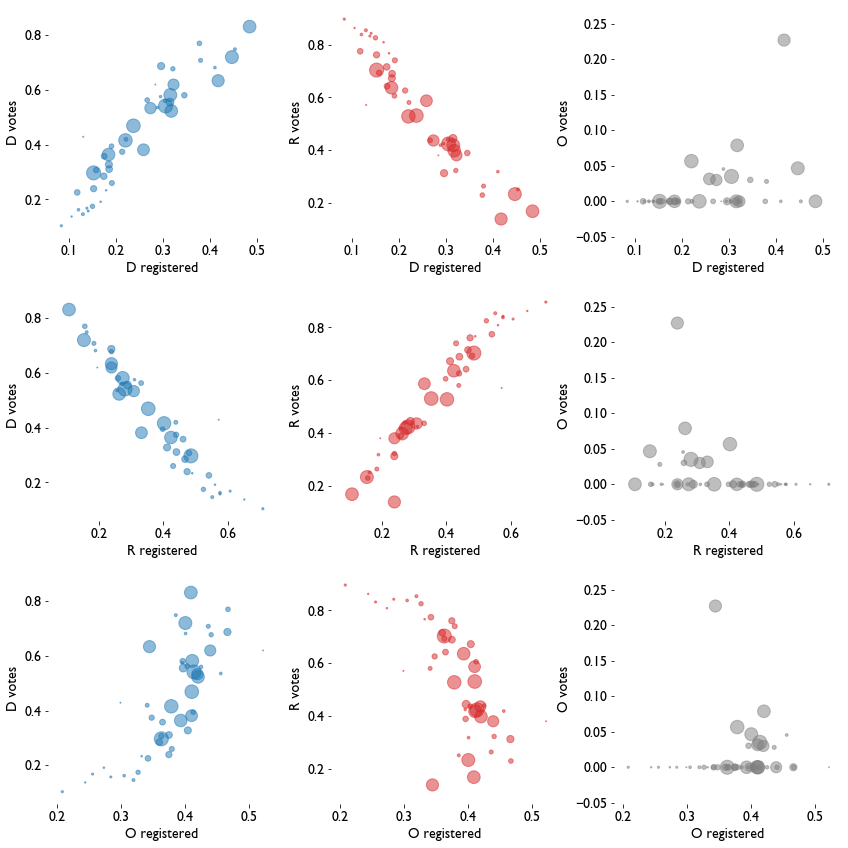

In [7]:
fig, ax = plt.subplots(3,3, figsize = (12,12))
print(len(ax))
ax_idx1 = 0
ax_idx2 = 0
vote_keys = ['D', 'R', 'O']
regs_keys = ['D', 'R', 'O']

color_key = {'D' :'tab:blue',
            'R' : 'tab:red',
            'O' : 'tab:gray'}
                       #[ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]
#fig.title('Registration as Fraction of Voting Body')

for vote_key in vote_keys:
    for regs_key in regs_keys:
        this_ax = ax[ax_idx1][ax_idx2]
        this_ax.scatter(regs_dict[regs_key], votes_dict[vote_key], 
                           s = tot_votes/min(tot_votes), 
                           label='{} vs {}'.format(regs_key, vote_key),
                            c = color_key[vote_key],
                           alpha=0.5)
        this_ax.set_xlabel('{} registered'.format(regs_key))
        this_ax.set_ylabel('{} votes'.format(vote_key))
        ax_idx1 += 1
    ax_idx1 = 0
    ax_idx2 += 1
fig.tight_layout()
fig.savefig('votes_vs_regs.png')

There is a very strong linear relationship between Democratic and Republican registration as a fraction of vote and the actual vote total. Let's try fitting a sigmoid function to the data

3
0.4107238957144226
D voters
 wd = 2.817339092424047 
 wr = -3.6212294027505836 
 w0 = 0.9990910941878112


0.007774378763025539


Text(0.5, 0, 'D registered')

Text(0, 0.5, 'D votes')

0.007774378763025539


Text(0.5, 0, 'R registered')

Text(0, 0.5, 'D votes')

0.007774378763025539


Text(0.5, 0, 'O registered')

Text(0, 0.5, 'D votes')

0.5136287752723948
R voters
 wd = -4.1894823791251525 
 wr = 3.399751054750633 
 w0 = -0.06907064495587419


0.008136026006156415


Text(0.5, 0, 'D registered')

Text(0, 0.5, 'R votes')

0.008136026006156415


Text(0.5, 0, 'R registered')

Text(0, 0.5, 'R votes')

0.008136026006156415


Text(0.5, 0, 'O registered')

Text(0, 0.5, 'R votes')

534536.8422636805
O voters
 wd = 159.1249821300371 
 wr = 33.763337561282896 
 w0 = -219.6605921920665


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


0.0028919841892142855


Text(0.5, 0, 'D registered')

Text(0, 0.5, 'O votes')

0.0028919841892142855


Text(0.5, 0, 'R registered')

Text(0, 0.5, 'O votes')

0.0028919841892142855


Text(0.5, 0, 'O registered')

Text(0, 0.5, 'O votes')

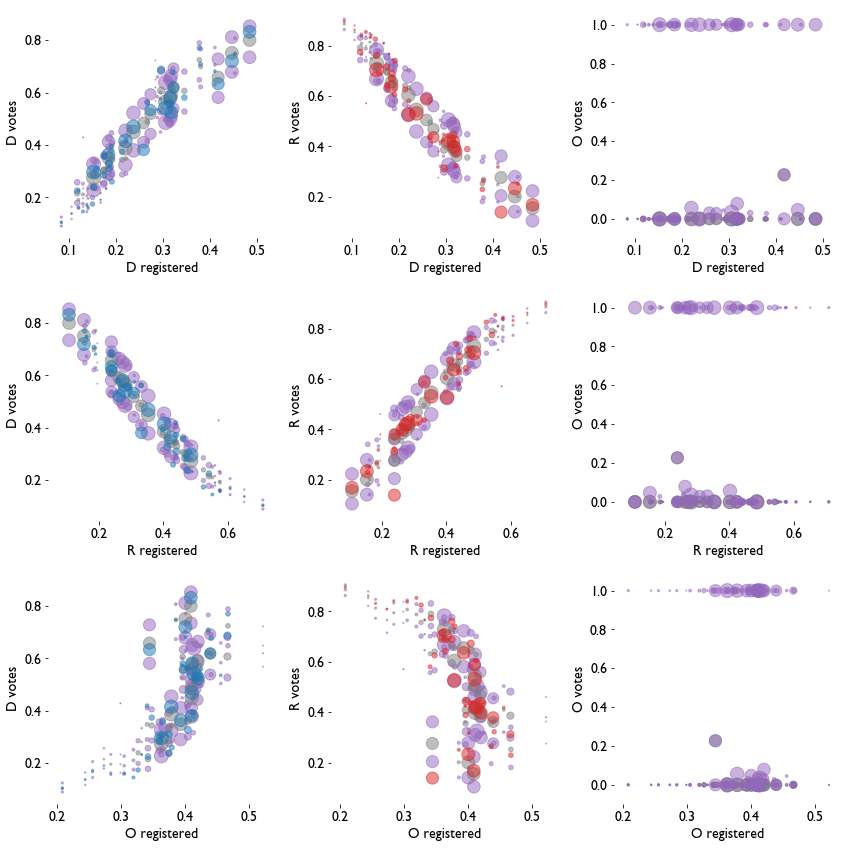

In [18]:
from scipy.optimize import curve_fit
import numpy as np

def sigmoid(X, wd, wr, wo):
    dems, reps, other = np.array(X)
    xx = wd*dems + wr*reps + wo*other
    return 1./(1. + np.exp(- (xx)))

fig, ax = plt.subplots(3,3, figsize = (12,12))
print(len(ax))
ax_idx1 = 0
ax_idx2 = 0
vote_keys = ['D', 'R', 'O']
regs_keys = ['D', 'R', 'O']

color_key = {'D' :'tab:blue',
            'R' : 'tab:red',
            'O' : 'tab:purple'}
                       #[ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]
#fig.title('Registration as Fraction of Voting Body')
reg_dict = {}

for vote_key in vote_keys:
    
    # fit the sigmoid curve
    [wd, wr, wo], pcov = curve_fit(sigmoid, [regs_dict['D'], regs_dict['R'], regs_dict['O']], votes_dict[vote_key])
    print(pcov[0,0])
    print('{} voters'.format(vote_key))
    print(' wd = {} \n wr = {} \n w0 = {}'.format(wd, wr, wo))
    y = sigmoid([regs_dict['D'], regs_dict['R'], regs_dict['O']], wd, wr, wo)
    y_plus = sigmoid([regs_dict['D'], regs_dict['R'], regs_dict['O']], wd+pcov[0,0], wr+pcov[1,1], wo+pcov[2,2])
    y_minus = sigmoid([regs_dict['D'], regs_dict['R'], regs_dict['O']], wd-pcov[0,0], wr-pcov[1,1], wo-pcov[2,2])
    reg_dict[vote_key] = [x0, wd, wr, wo]
    
    for regs_key in regs_keys:

        this_ax = ax[ax_idx1][ax_idx2]
        
        # plot projected vote fraction in black
        this_ax.scatter(regs_dict[regs_key], y_plus, s=tot_votes/min(tot_votes), c='tab:purple', alpha=0.5)
        this_ax.scatter(regs_dict[regs_key], y_minus, s=tot_votes/min(tot_votes), c='tab:purple', alpha=0.5)
        this_ax.scatter(regs_dict[regs_key], y, s=tot_votes/min(tot_votes), c='tab:gray', alpha=0.5);
        x = np.linspace(0., .5, 100)
        
        
        # plot actual vote fraction in partisan color
        this_ax.scatter(regs_dict[regs_key], votes_dict[vote_key], 
                           s = tot_votes/min(tot_votes), 
                           label='{} vs {}'.format(regs_key, vote_key),
                            c = color_key[vote_key],
                           alpha=0.5)


        print(np.sqrt(np.sum((np.array(y)-np.array(votes_dict[vote_key]))**2))/len(votes_dict[vote_key]))


        this_ax.set_xlabel('{} registered'.format(regs_key));
        this_ax.set_ylabel('{} votes'.format(vote_key));
        ax_idx1 += 1
    ax_idx1 = 0
    ax_idx2 += 1
fig.tight_layout()
fig.savefig('votes_vs_regs_regression.png')

## 2020 Predictions Based on Results

Using the linear regression model, we predict Democratic vote share in the interesting Senate districts for 2020.

In [38]:
# read in the data for the districts of interest
test_districts = ['SD 8',
'SD 19',
'SD 23',
'SD 25',
'SD 26',
'SD 27',
'SD 35'
]

reg_2020 = pd.read_excel('../data/registration/Jun_2020_voter_registration.xlsx', 'State Senate Districts', 
                                    header=2, names=columns)

# empty squares have no voters
reg_2020 = reg_2020.fillna(0)

# Remove each "Total" County instance
county_vals = (reg_2020.COUNTY != 'Total')
reg_2020 = reg_2020[county_vals]

reg_2020 = reg_2020.groupby(collapsed_columns, axis=1).sum()

reg_2020['COUNTY'] = reg_2020['COUNTY'].str.upper()

In [39]:
district_dict = {}
for district in test_districts:
    district_df = reg_2020[reg_2020['DISTRICT'] == district]
    county_proj = {}
    print(district)
    for county in district_df.COUNTY.unique():
        dem_voters = district_df[district_df.COUNTY == county]['DEM-ACTIVE'].values[0]
        rep_voters = district_df[district_df.COUNTY == county]['REP-ACTIVE'].values[0]
        other_voters = district_df[district_df.COUNTY == county]['OTHER-ACTIVE'].values[0]
        
        tot_voters = dem_voters + rep_voters + other_voters
        
        dem_frac = dem_voters/tot_voters
        rep_frac = rep_voters/tot_voters
        other_frac = other_voters/tot_voters
        
        dem_vote_frac = sigmoid([dem_frac, rep_frac, other_frac], *reg_dict['D'])
        rep_vote_frac = sigmoid([dem_frac, rep_frac, other_frac], *reg_dict['R'])
        #dem_vote_frac_plus  = 
        #dem_vote_frac_minus =
        #rep_vote_frac_plus  =
        #rep_vote_frac_minus = 
        
        county_proj[county] = [dem_vote_frac*tot_voters, rep_vote_frac*tot_voters]
    
    district_dict[district] = county_proj

SD 8
SD 19
SD 23
SD 25
SD 26
SD 27
SD 35


<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

Text(0, 3, '48,649')

Text(0, 3, '46,702')

[Text(0, 0, 'GARFIELD'),
 Text(0, 0, 'GRAND'),
 Text(0, 0, 'JACKSON'),
 Text(0, 0, 'MOFFAT'),
 Text(0, 0, 'RIO BLANCO'),
 Text(0, 0, 'ROUTT'),
 Text(0, 0, 'SUMMIT'),
 Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 8')

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0, 3, '61,240')

Text(0, 3, '40,169')

[Text(0, 0, 'JEFFERSON'), Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 19')

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 3, '65,665')

Text(0, 3, '73,965')

[Text(0, 0, 'BROOMFIELD'),
 Text(0, 0, 'LARIMER'),
 Text(0, 0, 'WELD'),
 Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 23')

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0, 3, '52,769')

Text(0, 3, '31,666')

[Text(0, 0, 'ADAMS'), Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 25')

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0, 3, '60,732')

Text(0, 3, '34,950')

[Text(0, 0, 'ARAPAHOE'), Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 26')

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0, 3, '54,316')

Text(0, 3, '45,524')

[Text(0, 0, 'ARAPAHOE'), Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 27')

<BarContainer object of 17 artists>

<BarContainer object of 17 artists>

Text(0, 3, '41,124')

Text(0, 3, '39,079')

[Text(0, 0, 'ALAMOSA'),
 Text(0, 0, 'BACA'),
 Text(0, 0, 'BENT'),
 Text(0, 0, 'CONEJOS'),
 Text(0, 0, 'COSTILLA'),
 Text(0, 0, 'CROWLEY'),
 Text(0, 0, 'CUSTER'),
 Text(0, 0, 'HUERFANO'),
 Text(0, 0, 'KIOWA'),
 Text(0, 0, 'LAS ANIMAS'),
 Text(0, 0, 'MINERAL'),
 Text(0, 0, 'OTERO'),
 Text(0, 0, 'PROWERS'),
 Text(0, 0, 'PUEBLO'),
 Text(0, 0, 'RIO GRANDE'),
 Text(0, 0, 'SAGUACHE'),
 Text(0, 0, 'TOTAL')]

Text(0.5, 1.0, 'Projected D votes in SD 35')

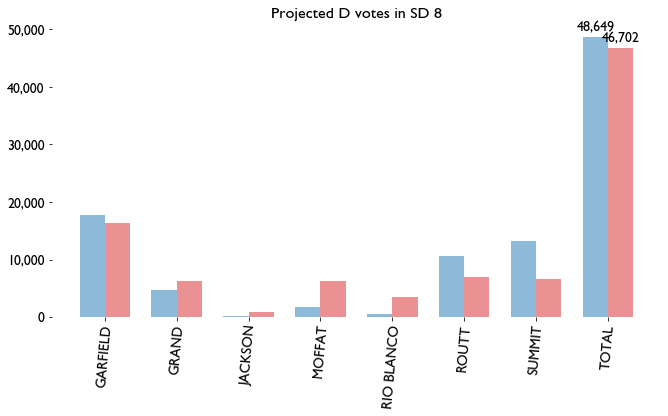

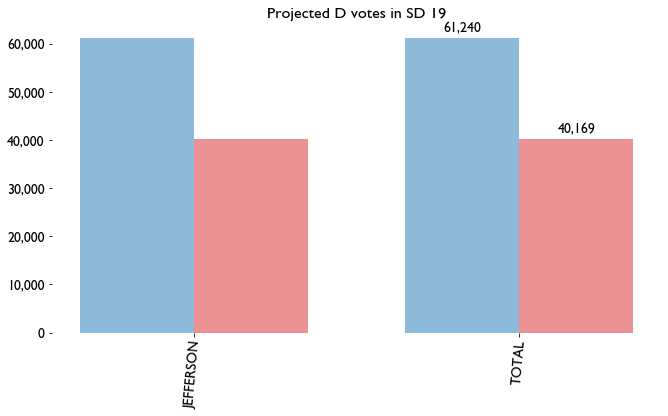

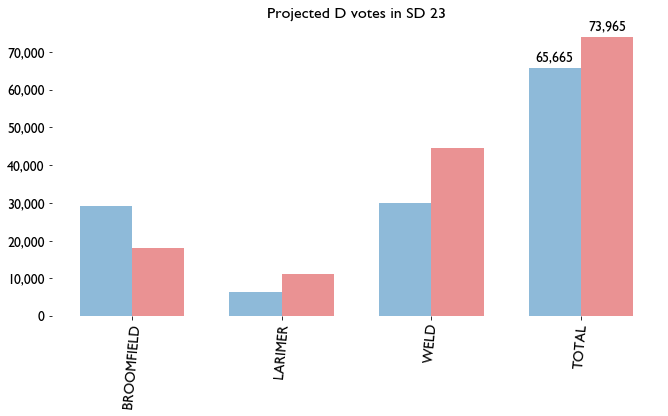

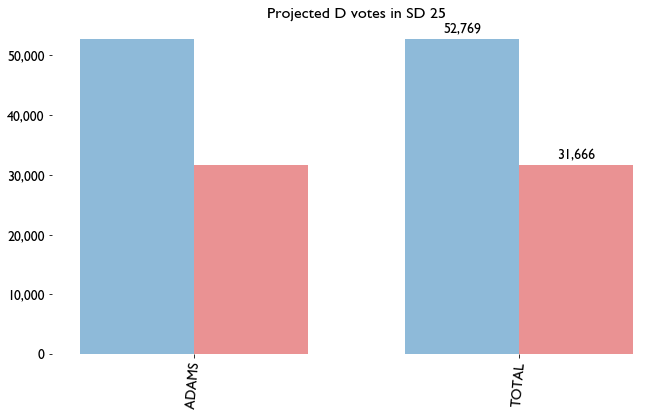

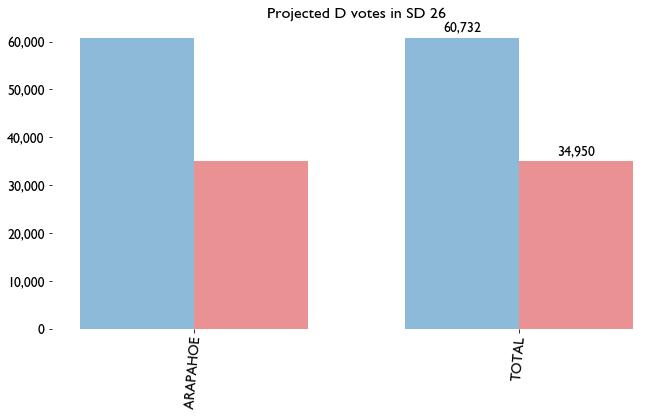

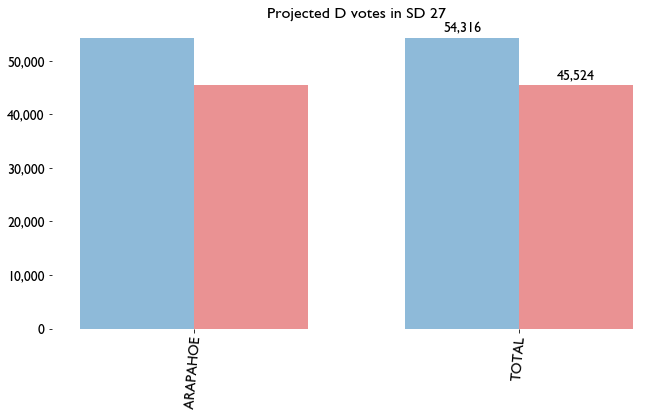

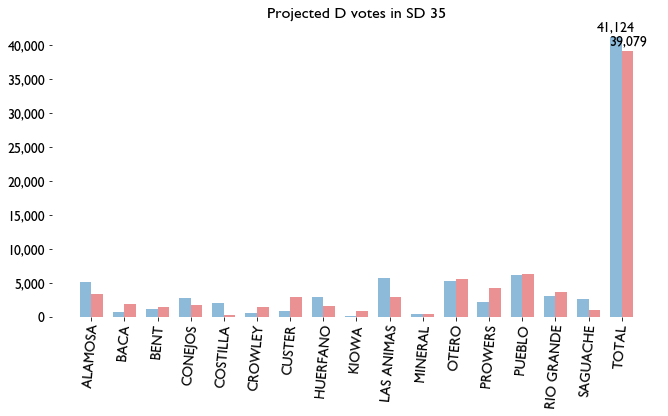

In [40]:
for district in test_districts:
    
    fig, ax = plt.subplots()
    labels = []
    y_dems = []
    y_reps = []
    width=0.35
    for county in district_dict[district].keys():
        labels.append(county)
        y_dems.append(district_dict[district][county][0])
        y_reps.append(district_dict[district][county][1])
         
    labels.append('TOTAL')
    y_dems.append(sum(y_dems))
    y_reps.append(sum(y_reps))
    
    x = np.arange(len(labels))

    ax.bar(x - width/2, y_dems, width, label='Dems', color='tab:blue', alpha=.5);
    ax.bar(x + width/2, y_reps, width, label='Reps', color='tab:red', alpha=.5);
    
    ax.annotate(format(int(y_dems[-1]), ','),
            xy=(x[-1]-width/2, y_dems[-1]),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom');
    
    ax.annotate(format(int(y_reps[-1]), ','),
            xy=(x[-1]+width/2, y_reps[-1]),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom');
    
    ax.set_xticks(x)
    for tick in ax.get_xticklabels():
        tick.set_rotation(85)
    ax.set_xticklabels(labels)
    ax.set_title('Projected D votes in {}'.format(district))
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    fig.tight_layout()
    
    fig.savefig('{}_projection.png'.format(district))
    
        